## Final Observations:
1) The 4 most effective treatments yielded the greatest number of samples - while not explicitly stated this is likely due to mouse mortality during the timeframe of the study.
2) There was only a single outlier in the tumor volume data for the top 4 most effective treatments - the lack of upper bound outliers suggests that none of the mice saw exceptionally rapid tumor growth during treatment while the lack of lower bound outliers suggests that none of the treatments yielded radically better results in one specific mouse or group of mice versus another group.
3) There appears to be a clear correlation between mouse bodyweight and tumor volume - in general, larger mice have larger tumors and smaller mice smaller tumors. This is logical that tumor sizes would be scaled with bodyweight.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

mouse_data_to_load = "data/Mouse_metadata.csv"
study_data_to_load = "data/Study_results.csv"

# Read data files and store into Pandas DataFrames
mouse_data = pd.read_csv(mouse_data_to_load)
study_data = pd.read_csv(study_data_to_load)

# Combine the data into a single dataset.  
mouse_data_df = pd.merge(mouse_data, study_data, how="left", on=["Mouse ID", "Mouse ID"])

mouse_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
#Print number of mouse ID before cleaning
unique_mice = mouse_data_df.nunique()
print(unique_mice)

Mouse ID               249
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
dtype: int64


In [4]:
#Identify duplicates
duplicates = mouse_data_df[mouse_data_df.duplicated(["Mouse ID","Timepoint"])]
print(duplicates)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [5]:
#Drop duplicate mouse id & re-print unique number of mice
mouse_data_df = mouse_data_df[mouse_data_df["Mouse ID"] != 'g989']

unique_mice_clean = mouse_data_df.nunique()
print(unique_mice_clean)

Mouse ID               248
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
dtype: int64


## Summary Statistics

In [6]:
# Index by Drug Regimen and then calculate summary stats
from itertools import count


mouse_data_summary_df = mouse_data_df.set_index("Drug Regimen")
mouse_data_summary_df = mouse_data_summary_df.groupby("Drug Regimen").agg(
    average_tumor_size=("Tumor Volume (mm3)", "mean"),
    median_tumor_size=("Tumor Volume (mm3)", "median"),
    variance_tumor_size=("Tumor Volume (mm3)", "var"),
    standard_deviation_tumor_size=("Tumor Volume (mm3)", "std"),
    sem_tumor_size=("Tumor Volume (mm3)", "sem"),
    total_timepoints=("Timepoint","count")
)

mouse_data_summary_df.head()

,average_tumor_size,median_tumor_size,variance_tumor_size,standard_deviation_tumor_size,sem_tumor_size,total_timepoints
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,230
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,178
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,178
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,188
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,186


## Bar and Pie Charts

<AxesSubplot:title={'center':'Total Timepoints by Drug Regimen'}, xlabel='Drug Regimen', ylabel='Total Timepoints'>

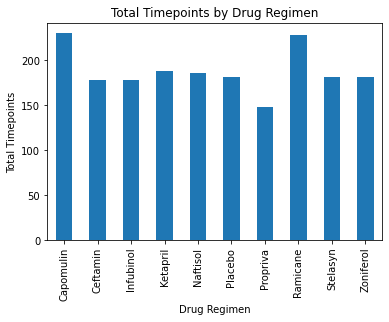

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

#Create bar chart using DataFrame.plot() method
mouse_data_summary_df.groupby(["Drug Regimen"])["total_timepoints"].sum().plot.bar(title="Total Timepoints by Drug Regimen", ylabel="Total Timepoints")

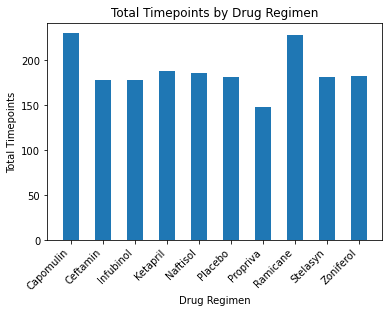

In [8]:
#Create bar chart using pyplot method
x_axis = mouse_data_summary_df.index
y_axis = mouse_data_summary_df["total_timepoints"]

summary_bar = plt.bar(x_axis, y_axis, width=0.5)
plt.title("Total Timepoints by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Timepoints")
plt.xticks(rotation=45, ha='right')
plt.show()

<AxesSubplot:title={'center':'Distribution of Mouse Sex'}>

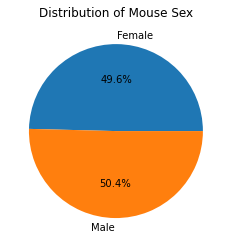

In [9]:
#Create pie chart using DataFrame.plot() method

mouse_sex_summary_df = mouse_data_df.set_index("Sex")
mouse_sex_summary_df = mouse_sex_summary_df.groupby("Sex").agg(
    unique_mice=("Mouse ID", pd.Series.nunique)
)
#Please expand visual if labels & title not displaying
labels = mouse_sex_summary_df.index
ylabel = ("")
mouse_sex_summary_df["unique_mice"].plot.pie(title="Distribution of Mouse Sex", labels=labels, ylabel=ylabel, autopct="%.1f%%")

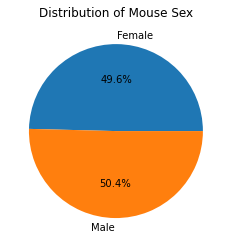

In [10]:
#Create pie chart using pyplot method
labels = mouse_sex_summary_df.index
y_axis = mouse_sex_summary_df["unique_mice"]

summary_bar = plt.pie(y_axis, labels=labels, autopct='%.1f%%')
plt.title("Distribution of Mouse Sex")
plt.show()

## Quartiles, Outliers and Boxplots

Capomulin
Empty DataFrame
Columns: [index, Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites, max_timepoint]
Index: []
Ramicane
Empty DataFrame
Columns: [index, Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites, max_timepoint]
Index: []
Infubinol
    index Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
58    669     c326    Infubinol  Female          18          25          5   

    Tumor Volume (mm3)  Metastatic Sites  max_timepoint  
58           36.321346                 0              5  
Ceftamin
Empty DataFrame
Columns: [index, Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites, max_timepoint]
Index: []


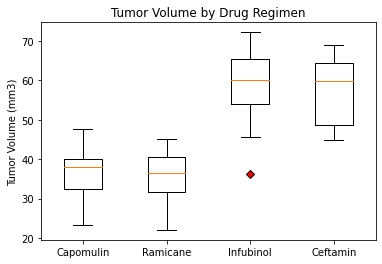

In [27]:
import numpy as np
from scipy import stats

#Create df to show last timepoint for each mouse
mouse_max_timepoint = mouse_data_df.groupby("Mouse ID").agg(
    max_timepoint=("Timepoint", "max")
)
#Merge to cleaned df & filter to top 4 Drug Regimens
mouse_data_merged_df = mouse_data_df.merge(mouse_max_timepoint,on=["Mouse ID"])
selected_drugs = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
mouse_data_merged_df = mouse_data_merged_df[mouse_data_merged_df["Drug Regimen"].isin(selected_drugs)]
mouse_data_merged_df = mouse_data_merged_df[mouse_data_merged_df["Timepoint"]==mouse_data_merged_df["max_timepoint"]]
mouse_data_merged_df = mouse_data_merged_df.reset_index()
#Create empty list for drug regimens & tumor volumes
drug_list = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
tumor_list = []
capomulin_tumors = []
ramicane_tumors = []
infubinol_tumors = []
ceftamin_tumors = []
counter = 0
#Loop through df to record drug name & tumor volume
for index, row in mouse_data_merged_df.iterrows():
        if mouse_data_merged_df["Drug Regimen"][counter]=="Capomulin":
            capomulin_tumors.append(mouse_data_merged_df["Tumor Volume (mm3)"][counter])
            counter += 1
        elif mouse_data_merged_df["Drug Regimen"][counter]=="Ramicane":
            ramicane_tumors.append(mouse_data_merged_df["Tumor Volume (mm3)"][counter])
            counter += 1
        elif mouse_data_merged_df["Drug Regimen"][counter]=="Infubinol":
            infubinol_tumors.append(mouse_data_merged_df["Tumor Volume (mm3)"][counter])
            counter += 1
        elif mouse_data_merged_df["Drug Regimen"][counter]=="Ceftamin":
            ceftamin_tumors.append(mouse_data_merged_df["Tumor Volume (mm3)"][counter])
            counter += 1

#Loop through treatments & display IQR & Outliers
tumor_data_dict = {"Capomulin": capomulin_tumors, "Ramicane": ramicane_tumors, "Infubinol": infubinol_tumors, "Ceftamin": ceftamin_tumors}
for i in tumor_data_dict:
    quartiles = mouse_data_merged_df[mouse_data_merged_df["Drug Regimen"]==i]["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = mouse_data_merged_df.loc[(mouse_data_merged_df[mouse_data_merged_df["Drug Regimen"]==i]["Tumor Volume (mm3)"] < lower_bound) | (mouse_data_merged_df["Tumor Volume (mm3)"] > upper_bound)]
    print(i)
    print(outliers)
#Identified a single lower bound outlier for Infubinol - no other outliers

#Generate box plot
fig1, ax1 = plt.subplots()
red_diamond = dict(markerfacecolor='r', marker='D')
ax1.set_title("Tumor Volume by Drug Regimen")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(tumor_data_dict.values(), flierprops=red_diamond)
ax1.set_xticklabels(tumor_data_dict.keys())
plt.show()

## Line & Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

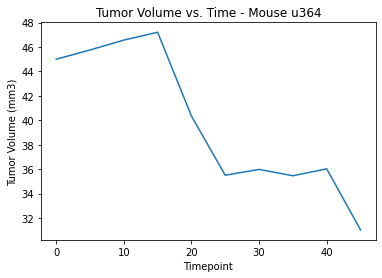

In [32]:
#Select a single mouse treated w/ Capomulin
mouse_u364 = mouse_data_df[mouse_data_df["Mouse ID"]=="u364"]

x_axis = mouse_u364["Timepoint"]
y_axis = mouse_u364["Tumor Volume (mm3)"]

u364_summary = plt.plot(x_axis, y_axis)
plt.title("Tumor Volume vs. Time - Mouse u364")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Tumor Volume (mm3)')

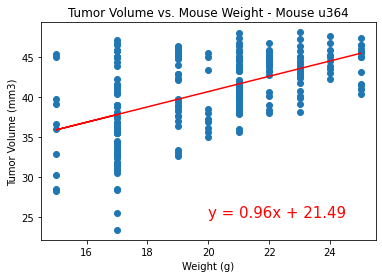

In [41]:
from scipy.stats import linregress

#Create scatter plot & plot regression model on plot
weight_vs_volume = mouse_data_df[mouse_data_df["Drug Regimen"]=="Capomulin"]

x_values = weight_vs_volume["Weight (g)"]
y_values = weight_vs_volume["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

u364_summary = plt.scatter(x_axis, y_axis)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,25),fontsize=15,color="red")
plt.title("Tumor Volume vs. Mouse Weight - Mouse u364")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")